# 0. Import Data

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:

!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
raw_data = pd.read_csv("./compas-scores-two-years.csv")

In [4]:
raw_data.columns


Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [5]:
raw_data['v_decile_score']


0       1
1       1
2       3
3       6
4       1
       ..
7209    5
7210    5
7211    1
7212    2
7213    4
Name: v_decile_score, Length: 7214, dtype: int64

In [6]:
raw_data['decile_score' ]

0       1
1       3
2       4
3       8
4       1
       ..
7209    7
7210    3
7211    1
7212    2
7213    4
Name: decile_score, Length: 7214, dtype: int64

In [7]:
df = raw_data[['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count',
               'days_b_screening_arrest','v_decile_score' ,'decile_score', 'is_recid', 'two_year_recid', 'c_jail_in', 'c_jail_out','event']]

# Filter rows based on criteria
df = df[(df['days_b_screening_arrest'] <= 30) &
        (df['days_b_screening_arrest'] >= -30) &
        (df['is_recid'] != -1) &
        (df['c_charge_degree'] != 'O') &
        (df['score_text'] != 'N/A')]

In [8]:
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])

# Calculate length_of_stay
df['length_of_stay'] = (df['c_jail_out'] - df['c_jail_in']).dt.days

# Calculate correlation
correlation = df['two_year_recid'].corr(df['event'])

print(correlation)

0.7931836488254276


In [9]:
summary = df['age_cat'].value_counts()
print(summary)

age_cat
25 - 45            3532
Less than 25       1347
Greater than 45    1293
Name: count, dtype: int64


In [10]:
print(df.columns)

Index(['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex',
       'priors_count', 'days_b_screening_arrest', 'v_decile_score',
       'decile_score', 'is_recid', 'two_year_recid', 'c_jail_in', 'c_jail_out',
       'event', 'length_of_stay'],
      dtype='object')


In [11]:
df['event']

0       0
1       1
2       0
5       0
6       1
       ..
7209    0
7210    0
7211    0
7212    0
7213    0
Name: event, Length: 6172, dtype: int64

In [12]:
X=pd.get_dummies(df.drop(['days_b_screening_arrest','c_jail_in', 'c_jail_out','event','is_recid','score_text',
                          
        'two_year_recid'
                         ], axis=1))
y=df['event']

In [13]:
X


,age,priors_count,v_decile_score,decile_score,length_of_stay,c_charge_degree_F,c_charge_degree_M,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,age_cat_25 - 45,age_cat_Greater than 45,age_cat_Less than 25,sex_Female,sex_Male
0,69,0,1,1,0,True,False,False,False,False,False,False,True,False,True,False,False,True
1,34,0,1,3,10,True,False,True,False,False,False,False,False,True,False,False,False,True
2,24,4,3,4,1,True,False,True,False,False,False,False,False,False,False,True,False,True
5,44,0,1,1,1,False,True,False,False,False,False,False,True,True,False,False,False,True
6,41,14,2,6,6,True,False,False,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,23,0,5,7,1,True,False,True,False,False,False,False,False,False,False,True,False,True
7210,23,0,5,3,1,True,False,True,False,False,False,False,False,False,False,True,False,True
7211,57,0,1,1,1,True,False,False,False,False,False,False,True,False,True,False,False,True
7212,33,3,2,2,1,False,True,True,False,False,False,False,False,True,False,False,True,False


In [14]:
y

0       0
1       1
2       0
5       0
6       1
       ..
7209    0
7210    0
7211    0
7212    0
7213    0
Name: event, Length: 6172, dtype: int64

In [15]:
# gender_factor + age_factor + race_factor +
                            # priors_count + crime_factor + two_year_recid,

In [16]:
# X = pd.get_dummies(df.drop(['Churn', 'Customer ID'], axis=1))
# y = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [18]:
y_train.head()

3302    0
6638    1
1780    1
1408    0
3943    0
Name: event, dtype: int64

# 1. Import Dependencies

In [19]:

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# 2. Build and Compile Model

In [20]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [21]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

# 3. Fit, Predict and Evaluate

In [22]:
import numpy as np
print("X_train dtype:", X_train.dtypes)
print("y_train dtype:", y_train.dtypes)


X_train dtype: age                        int64
priors_count               int64
v_decile_score             int64
decile_score               int64
length_of_stay             int64
c_charge_degree_F           bool
c_charge_degree_M           bool
race_African-American       bool
race_Asian                  bool
race_Caucasian              bool
race_Hispanic               bool
race_Native American        bool
race_Other                  bool
age_cat_25 - 45             bool
age_cat_Greater than 45     bool
age_cat_Less than 25        bool
sex_Female                  bool
sex_Male                    bool
dtype: object
y_train dtype: int64


In [23]:

import tensorflow as tf

X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)

model.fit(X_train_tensor, y_train_tensor, epochs=500, batch_size=64)


Epoch 1/500


78/78 [==============================] - 2s 4ms/step - loss: 0.8493 - accuracy: 0.6115
Epoch 2/500
78/78 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.6380
Epoch 3/500
78/78 [==============================] - 0s 4ms/step - loss: 0.6501 - accuracy: 0.6388
Epoch 4/500
78/78 [==============================] - 0s 3ms/step - loss: 0.6366 - accuracy: 0.6405
Epoch 5/500
78/78 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.6542
Epoch 6/500
78/78 [==============================] - 0s 4ms/step - loss: 0.6287 - accuracy: 0.6506
Epoch 7/500
78/78 [==============================] - 0s 4ms/step - loss: 0.6309 - accuracy: 0.6563
Epoch 8/500
78/78 [==============================] - 0s 3ms/step - loss: 0.6207 - accuracy: 0.6599
Epoch 9/500
78/78 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.6567
Epoch 10/500
78/78 [==============================] - 0s 3ms/step - loss: 0.6215 - accuracy: 0.6607
Epoch 1

In [24]:

X_test_tensor=tf.convert_to_tensor(X_test, dtype=tf.float32)
y_hat = model.predict(X_test_tensor)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]



39/39 [==============================] - 0s 2ms/step


In [25]:
a=accuracy_score(y_test, y_hat)


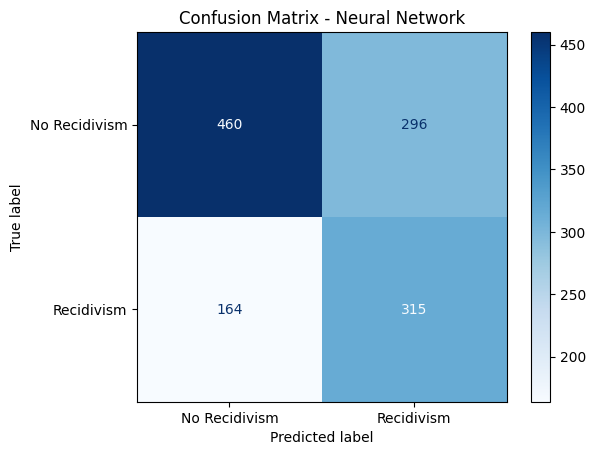

In [26]:
!pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_nn = confusion_matrix(y_test, y_hat)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=['No Recidivism', 'Recidivism'])
disp_nn.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Neural Network')
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

lr.fit(X_train, y_train)
y_predlr = lr.predict(X_test)



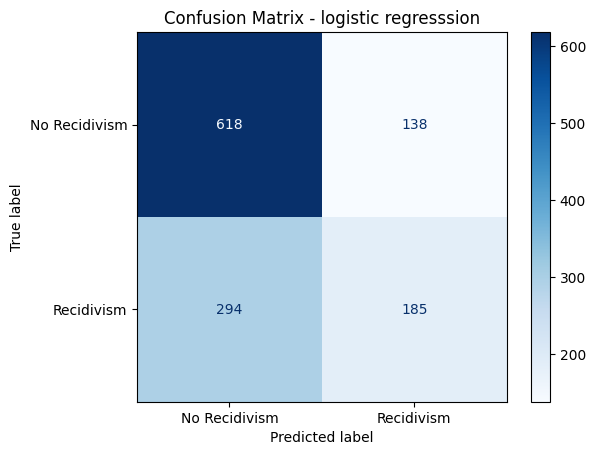

In [28]:
cm_nn = confusion_matrix(y_test, y_predlr)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=['No Recidivism', 'Recidivism'])
disp_nn.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - logistic regresssion')
plt.show()

In [29]:
b=accuracy_score(y_test, y_predlr)


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)




RandomForestClassifier()

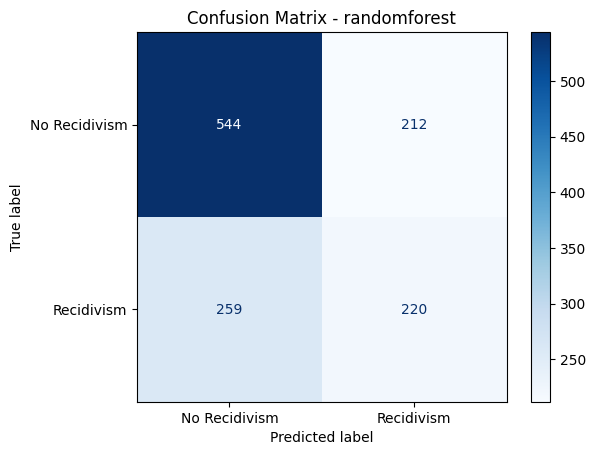

In [31]:
y_pred = rf.predict(X_test)

# Generating the confusion matrix
cm_nn = confusion_matrix(y_test, y_pred)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=['No Recidivism', 'Recidivism'])
disp_nn.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - randomforest')
plt.show()

In [32]:
c=accuracy_score(y_test, y_pred)

In [33]:
model_names = ['Sequential', 'Logistic Regression', 'randomforest']


accuracy_values = [a, b, c] 

In [34]:
accuracy_values

[0.6275303643724697, 0.6502024291497975, 0.6186234817813765]

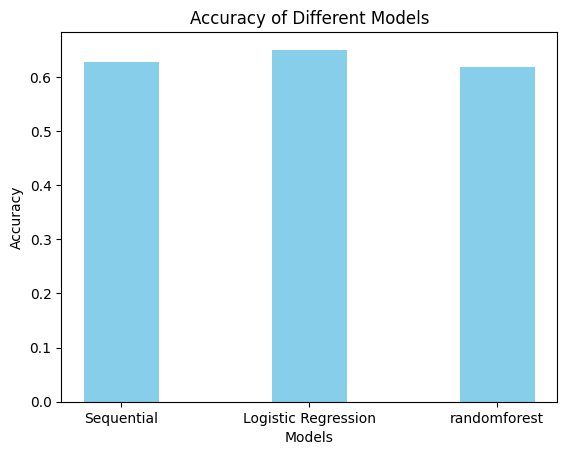

In [35]:
plt.bar(model_names, accuracy_values, color ='skyblue', 
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.show()

In [37]:
import pickle

pickle.dump(model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))


In [45]:
!pip install tensorflowjs --user

In [44]:
from tensorflowjs import tfjs

ModuleNotFoundError: No module named 'tensorflowjs'

# 4. Saving and Reloading

In [ ]:
model.save('tfmodel')

In [213]:
del model 

In [142]:
model = load_model('tfmodel')